In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from arch import arch_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from arch.univariate import ConstantMean, GARCH, EGARCH, FIGARCH #IGARCH, TGARCH, QGARCH, GARHC-M - ?
#from arch.multivariate import DCC, ConstantMean, MultivariateGARCH

In [ ]:
df = pd.read_csv("LKOH_volume.csv")
#df['log return'] = np.log(df['close'] / df['close'].shift(1))
df['log return'] = np.log(df['close']) - np.log(df['close'].shift(1))
df.loc[0, 'log return'] = 0
#df['log return'].dropna()
df

,open,close,high,low,value,volume,begin,end,log return
0,4050.0,4020.0,4058.5,4003.0,170827644.5,42501,2022-06-01 10:00:00,2022-06-01 10:09:59,0.000000
1,4020.0,4046.5,4047.5,4015.0,78011031.5,19337,2022-06-01 10:10:00,2022-06-01 10:19:59,0.006570
2,4047.5,4061.0,4074.0,4041.5,57751560.5,14226,2022-06-01 10:20:00,2022-06-01 10:29:59,0.003577
3,4061.0,4065.0,4075.0,4055.0,42160274.5,10374,2022-06-01 10:30:00,2022-06-01 10:39:59,0.000984
4,4062.0,4065.0,4070.0,4056.0,33294978.5,8192,2022-06-01 10:40:00,2022-06-01 10:49:59,0.000000
...,...,...,...,...,...,...,...,...,...
37053,6838.5,6833.5,6842.0,6820.5,53772946.0,7875,2024-11-26 19:10:00,2024-11-26 19:19:59,-0.000731
37054,6833.5,6859.0,6860.0,6831.0,54918328.0,8022,2024-11-26 19:20:00,2024-11-26 19:29:59,0.003725
37055,6860.0,6855.0,6885.0,6850.5,83916838.0,12222,2024-11-26 19:30:00,2024-11-26 19:39:59,-0.000583
37056,6855.0,6868.0,6870.0,6854.5,22868565.5,3332,2024-11-26 19:40:00,2024-11-26 19:49:59,0.001895


In [338]:
df.loc[0, 'begin']

'2022-06-01 10:00:00'

In [339]:
#df[0:53]
#df[53:106]
#df[106:159]

In [340]:
df1 = df[['begin', 'end', 'log return']].copy()
df1

,begin,end,log return
0,2022-06-01 10:00:00,2022-06-01 10:09:59,0.000000
1,2022-06-01 10:10:00,2022-06-01 10:19:59,0.006570
2,2022-06-01 10:20:00,2022-06-01 10:29:59,0.003577
3,2022-06-01 10:30:00,2022-06-01 10:39:59,0.000984
4,2022-06-01 10:40:00,2022-06-01 10:49:59,0.000000
...,...,...,...
37053,2024-11-26 19:10:00,2024-11-26 19:19:59,-0.000731
37054,2024-11-26 19:20:00,2024-11-26 19:29:59,0.003725
37055,2024-11-26 19:30:00,2024-11-26 19:39:59,-0.000583
37056,2024-11-26 19:40:00,2024-11-26 19:49:59,0.001895


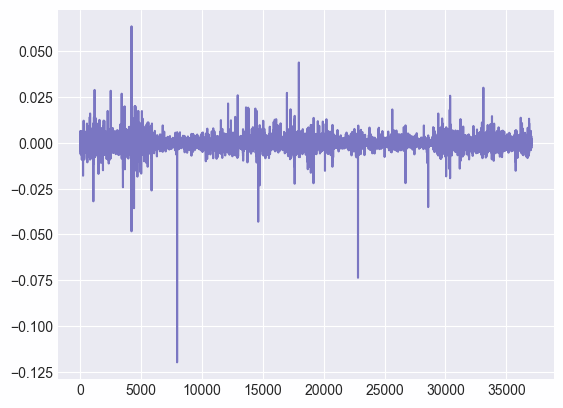

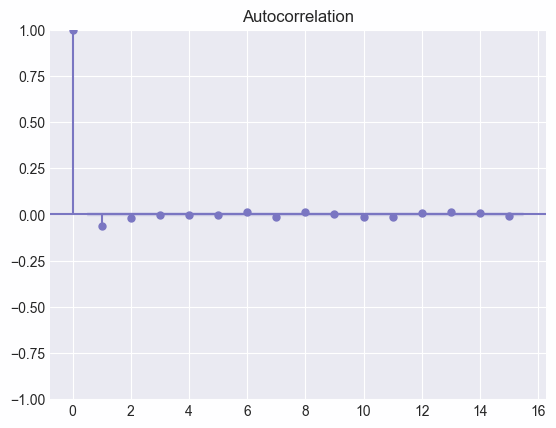

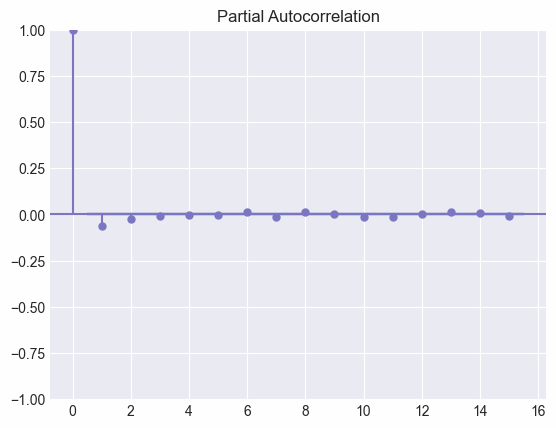

In [341]:
plt.plot(df['log return'])
plot_acf(df['log return'], lags = 15)
plot_pacf(df['log return'], lags = 15)
plt.show()

In [342]:
# split into train/test
n_test = 54
train, test = df['log return'][:-n_test], df['log return'][-n_test:]
train

0        0.000000
1        0.006570
2        0.003577
3        0.000984
4        0.000000
           ...   
36999   -0.002105
37000    0.006519
37001   -0.003979
37002    0.002389
37003   -0.002244
Name: log return, Length: 37004, dtype: float64

In [343]:
#model = arch_model(train, mean='Zero', vol='ARCH', p=1)
model = arch_model(train, mean='Constant', vol='ARCH', p=1)
# fit model
results = model.fit()
print(results.summary())

c:\Users\HONOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.24e-06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\HONOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:      4,   Neg. LLF: -175069.26758560832
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -175069.26757337883
            Iterations: 1
            Function evaluations: 4
            Gradient evaluations: 1
                      Constant Mean - ARCH Model Results                      
Dep. Variable:             log return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                175069.
Distribution:                  Normal   AIC:                          -350133.
Method:            Maximum Likelihood   BIC:                          -350107.
                                        No. Observations:                37004
Date:                Mon, Dec 02 2024   Df Residuals:                    37003
Time:                        01:08:36   Df Model:                            1
        

           h.01      h.02      h.03      h.04      h.05      h.06      h.07  \
37003  0.000005  0.000005  0.000005  0.000005  0.000005  0.000005  0.000005   

           h.08      h.09      h.10  ...      h.45      h.46      h.47  \
37003  0.000005  0.000005  0.000005  ...  0.000005  0.000005  0.000005   

           h.48      h.49      h.50      h.51      h.52      h.53      h.54  
37003  0.000005  0.000005  0.000005  0.000005  0.000005  0.000005  0.000005  

[1 rows x 54 columns]


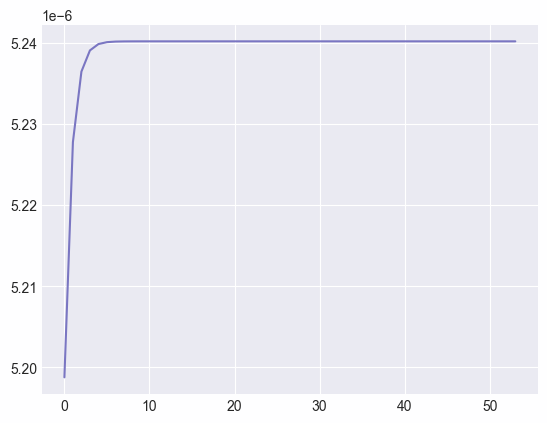

In [344]:
# forecast the test set
forecast = results.forecast(horizon=n_test)
print(forecast.variance[-1:])
#print(mean_squared_error(df['log return'][-n_test:], forecast))
plt.plot(forecast.variance.values[-1, :])
plt.show()

In [345]:
#model = arch_model(train, mean='Zero', vol='GARCH', p=1, q=1)
model = arch_model(train, mean='Constant', vol='GARCH', p=1)
# fit model
results = model.fit()
print(results.summary())

c:\Users\HONOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.24e-06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      5,   Neg. LLF: -176789.8179973449
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -176789.81746493673
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1
                     Constant Mean - GARCH Model Results                      
Dep. Variable:             log return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                176790.
Distribution:                  Normal   AIC:                          -353572.
Method:            Maximum Likelihood   BIC:                          -353538.
                                        No. Observations:                37004
Date:                Mon, Dec 02 2024   Df Residuals:                    37003
Time:                        01:08:54   Df Model:                            1
         

c:\Users\HONOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


           h.01      h.02      h.03      h.04      h.05      h.06      h.07  \
36997  0.000018  0.000018  0.000018  0.000018  0.000018  0.000018  0.000017   

           h.08      h.09      h.10  ...      h.45      h.46      h.47  \
36997  0.000017  0.000017  0.000017  ...  0.000014  0.000014  0.000014   

           h.48      h.49      h.50      h.51      h.52      h.53      h.54  
36997  0.000014  0.000013  0.000013  0.000013  0.000013  0.000013  0.000013  

[1 rows x 54 columns]


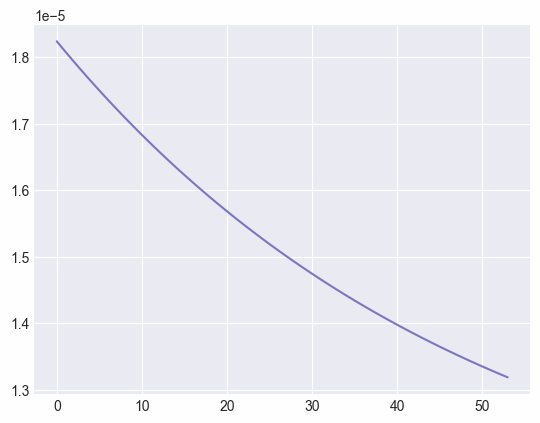

In [ ]:
forecast = results.forecast(horizon=n_test)
print(forecast.variance[-1:])
#print(mean_squared_error(df['log return'][-n_test:], yhat))
plt.plot(forecast.variance.values[-1, :])
plt.show()

In [62]:
split = "2024-11-01"
train  = df[df['begin'] < split]
test = df[df['begin'] >= split]
#n_test = 10
#train, test = df["log return"][:-n_test], df["log return"][-n_test:]

In [346]:
df['log return'][:-20]
#df['log return'][-20:]

0        0.000000
1        0.006570
2        0.003577
3        0.000984
4        0.000000
           ...   
37033   -0.001601
37034    0.001165
37035   -0.001019
37036   -0.000874
37037   -0.001021
Name: log return, Length: 37038, dtype: float64

c:\Users\HONOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.24e-06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\HONOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Inequality constraints incompatible    (Exit mode 4)
            Current function value: -176789.81746493673
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1

           h.01      h.02      h.03      h.04      h.05      h.06      h.07  \
37003  0.000006  0.000006  0.000006  0.000006  0.000006  0.000006  0.000006   

           h.08      h.09      h.10  ...      h.45      h.46      h.47  \
37003  0.000006  0.000006  0.000006  ...  0.000006  0.000006  0.000006   

           h.48      h.49      h.50      h.51      h.52      h.53      h.54  
37003  0.000006  0.000006  0.000006  0.000006  0.000006  0.000006  0.000006  

[1 rows x 54 columns]


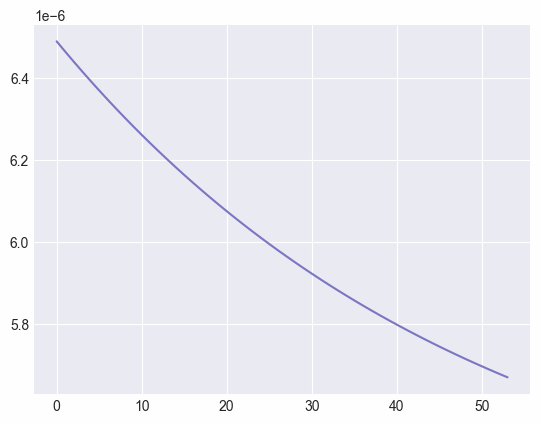

In [347]:
am = arch_model(df['log return'][:-n_test], vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=n_test)
print()
forecasts = res.forecast(horizon=n_test)
print(forecasts.residual_variance.iloc[-3:])
plt.plot(forecasts.variance.values[-1, :])
plt.show()

In [348]:
n_window = 540

df['Previous_10_Day_Volatility'] = df['log return'].rolling(window = n_window).std()
df['Previous_30_Day_Volatility'] = df['log return'].rolling(window = 3*n_window).std()

print(df.tail())

         open   close    high     low       value  volume  \
37053  6838.5  6833.5  6842.0  6820.5  53772946.0    7875   
37054  6833.5  6859.0  6860.0  6831.0  54918328.0    8022   
37055  6860.0  6855.0  6885.0  6850.5  83916838.0   12222   
37056  6855.0  6868.0  6870.0  6854.5  22868565.5    3332   
37057  6868.0  6849.5  6868.0  6849.5  14388167.0    2098   

                     begin                  end  log return  \
37053  2024-11-26 19:10:00  2024-11-26 19:19:59   -0.000731   
37054  2024-11-26 19:20:00  2024-11-26 19:29:59    0.003725   
37055  2024-11-26 19:30:00  2024-11-26 19:39:59   -0.000583   
37056  2024-11-26 19:40:00  2024-11-26 19:49:59    0.001895   
37057  2024-11-26 19:50:00  2024-11-26 19:59:59   -0.002697   

       Previous_10_Day_Volatility  Previous_30_Day_Volatility  
37053                    0.001970                    0.001913  
37054                    0.001977                    0.001915  
37055                    0.001977                    0.001915 

In [349]:
n_window = 540
df['Next_10_Days_Volatility'] = df['log return'].iloc[::-1].rolling(window = n_window).std().iloc[::-1]
print(df.head())

     open   close    high     low        value  volume                begin  \
0  4050.0  4020.0  4058.5  4003.0  170827644.5   42501  2022-06-01 10:00:00   
1  4020.0  4046.5  4047.5  4015.0   78011031.5   19337  2022-06-01 10:10:00   
2  4047.5  4061.0  4074.0  4041.5   57751560.5   14226  2022-06-01 10:20:00   
3  4061.0  4065.0  4075.0  4055.0   42160274.5   10374  2022-06-01 10:30:00   
4  4062.0  4065.0  4070.0  4056.0   33294978.5    8192  2022-06-01 10:40:00   

                   end  log return  Previous_10_Day_Volatility  \
0  2022-06-01 10:09:59    0.000000                         NaN   
1  2022-06-01 10:19:59    0.006570                         NaN   
2  2022-06-01 10:29:59    0.003577                         NaN   
3  2022-06-01 10:39:59    0.000984                         NaN   
4  2022-06-01 10:49:59    0.000000                         NaN   

   Previous_30_Day_Volatility  Next_10_Days_Volatility  
0                         NaN                 0.002760  
1             

In [350]:
#df.dropna(inplace = True)
#df

In [351]:
# --- Calculate Realized Volatility (RV) and Realized Quarticity (RQ) ---
df['RV'] = df['log return'].pow(2)
df['RQ'] = df['log return'].pow(4)

In [352]:
# --- HAR Model Estimation ---
# Prepare data for the HAR model. Using rolling window (more realistic).

window_size = 22 #This is the number of months. 
df['RV_lag1'] = df['RV'].shift(1)
df['RV_lag1'] = np.sqrt(df['RV_lag1']) # daily RV

df['RV_lag5'] = df['RV'].rolling(window=5).mean().shift(1) # weekly RV  
df['RV_lag22'] = df['RV'].rolling(window=22).mean().shift(1) # monthly RV


df['RQ_lag1'] = df['RQ'].shift(1)
df['RQ_lag1'] = np.sqrt(df['RQ_lag1']) # daily RQ
df['RQ_lag5'] = df['RQ'].rolling(window=5).mean().shift(1) # weekly RQ
df['RQ_lag22'] = df['RQ'].rolling(window=22).mean().shift(1) # monthly RV

df = df.dropna()

In [353]:
# Check for stationarity with adf test
print("p-value for daily RV:", adfuller(df['RV_lag1'].values)[1])
print("p-value for weekly RV:", adfuller(df['RV_lag5'].values)[1])
print("p-value for monthly RV:", adfuller(df['RV_lag22'].values)[1])

p-value for daily RV: 2.9064032824817306e-27
p-value for weekly RV: 0.0
p-value for monthly RV: 0.0


                            OLS Regression Results                            
Dep. Variable:                     RV   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     82.38
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           4.20e-53
Time:                        01:10:23   Log-Likelihood:             2.7570e+05
No. Observations:               34900   AIC:                        -5.514e+05
Df Residuals:                   34896   BIC:                        -5.514e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.97e-07   5.84e-07      0.337      0.7

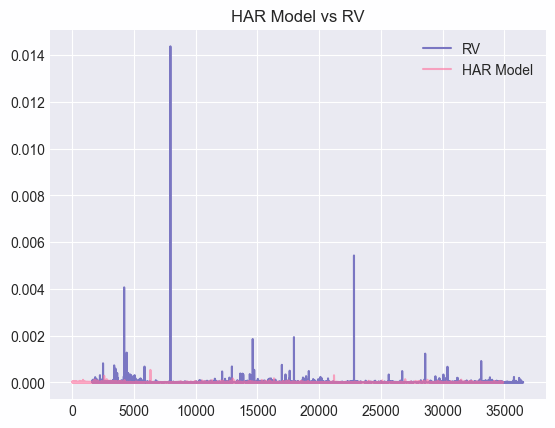

In [354]:
#HAR Model
X = sm.add_constant(df[['RV_lag1', 'RV_lag5', 'RV_lag22']])
model_har = sm.OLS(df['RV'], X).fit()
print(model_har.summary())
plt.figure()
plt.plot(df['RV'], label='RV')
plt.plot(model_har.predict(), label='HAR Model')
plt.legend()
plt.title("HAR Model vs RV")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                     RV   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     57.30
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           7.63e-71
Time:                        01:10:31   Log-Likelihood:             2.7575e+05
No. Observations:               34900   AIC:                        -5.515e+05
Df Residuals:                   34893   BIC:                        -5.514e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.189e-07   6.27e-07      0.828      0.4

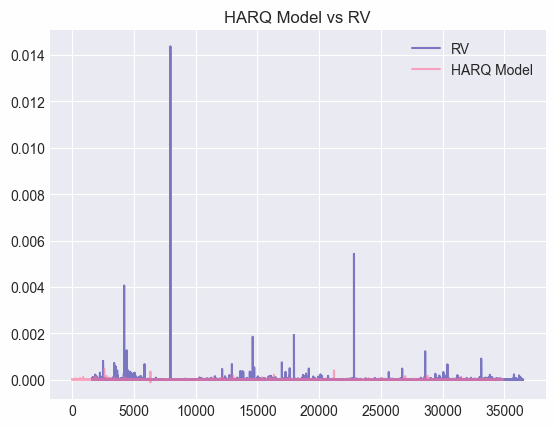

In [355]:
#HARQ Model
X_harq = sm.add_constant(df[['RV_lag1', 'RV_lag5', 'RV_lag22', 'RQ_lag1', 'RQ_lag5', 'RQ_lag22']])
model_harq = sm.OLS(df['RV'], X_harq).fit()
print(model_harq.summary())
plt.figure()
plt.plot(df['RV'], label='RV')
plt.plot(model_harq.predict(), label='HARQ Model')
plt.legend()
plt.title("HARQ Model vs RV")
plt.show()

In [356]:
#Example prediction (last observation)
last_obs = df.iloc[-1]
har_forecast = model_har.predict(exog = np.array([1, last_obs['RV_lag1'], last_obs['RV_lag5'], last_obs['RV_lag22']]).reshape(1, -1))
harq_forecast = model_harq.predict(exog = np.array([1, last_obs['RV_lag1'], last_obs['RV_lag5'], last_obs['RV_lag22'], last_obs['RQ_lag1'], last_obs['RQ_lag5'], last_obs['RQ_lag22']]).reshape(1, -1))

print(f"HAR Forecast: {har_forecast[0]}")
print(f"HARQ Forecast: {harq_forecast[0]}")

HAR Forecast: 2.535808814009786e-07
HARQ Forecast: 7.462489071045805e-07


c:\Users\HONOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.004e-06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\HONOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



ARCH(1,1) Model Results:
                      Constant Mean - ARCH Model Results                      
Dep. Variable:             log return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                165930.
Distribution:                  Normal   AIC:                          -331854.
Method:            Maximum Likelihood   BIC:                          -331829.
                                        No. Observations:                34900
Date:                Mon, Dec 02 2024   Df Residuals:                    34899
Time:                        01:11:21   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.8929e-05  1.715e

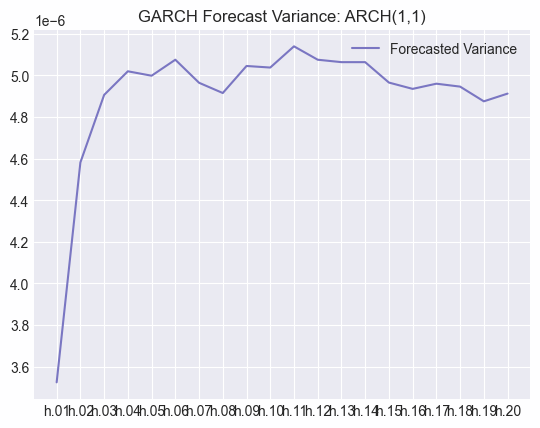

c:\Users\HONOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.004e-06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\HONOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



GARCH(1,1) Model Results:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:             log return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                167348.
Distribution:                  Normal   AIC:                          -334687.
Method:            Maximum Likelihood   BIC:                          -334653.
                                        No. Observations:                34900
Date:                Mon, Dec 02 2024   Df Residuals:                    34899
Time:                        01:11:23   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.8929e-05  2.655e-0

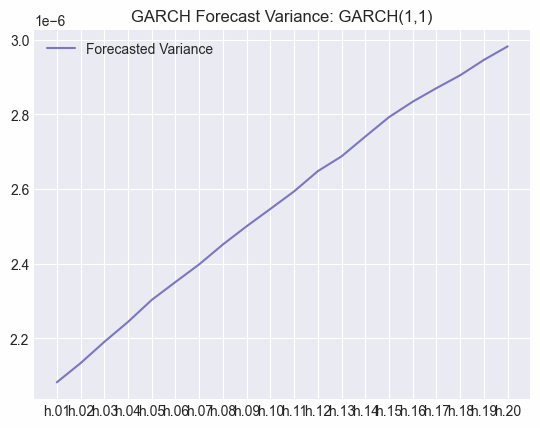

c:\Users\HONOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.004e-06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\HONOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



EGARCH(1,1) Model Results:
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:             log return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:           -6.77281e+08
Distribution:                  Normal   AIC:                       1.35456e+09
Method:            Maximum Likelihood   BIC:                       1.35456e+09
                                        No. Observations:                34900
Date:                Mon, Dec 02 2024   Df Residuals:                    34899
Time:                        01:11:24   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.8929e-05  4.65

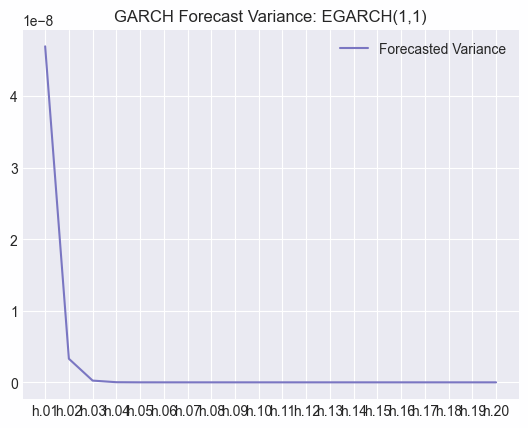

c:\Users\HONOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.004e-06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\HONOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



FIGARCH(1,1) Model Results:
                    Constant Mean - FIGARCH Model Results                     
Dep. Variable:             log return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:                167213.
Distribution:                  Normal   AIC:                          -334416.
Method:            Maximum Likelihood   BIC:                          -334373.
                                        No. Observations:                34900
Date:                Mon, Dec 02 2024   Df Residuals:                    34899
Time:                        01:11:29   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.8929e-05  4.7

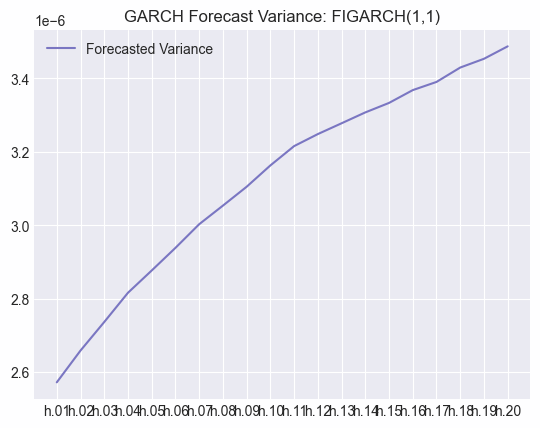

In [357]:
garch_models = {
    "ARCH(1,1)": arch_model(df['log return'], mean='Constant', vol='ARCH', p=1, q=1),
    "GARCH(1,1)": arch_model(df['log return'], mean='Constant', vol='GARCH', p=1, q=1),
    "EGARCH(1,1)": arch_model(df['log return'], mean='Constant', vol='EGARCH', p=1, q=1),
    #"IGARCH(1,1)": arch_model(df['log return'], mean='Constant', vol='IGARCH', p=1, q=1),
    "FIGARCH(1,1)": arch_model(df['log return'], mean='Constant', vol='FIGARCH', p=1, q=1)
}

for model_name, model in garch_models.items():
    res = model.fit(disp='off')
    print(f"\n{model_name} Model Results:")
    print(res.summary())
    #forecast = res.forecast(horizon=20)
    forecast = res.forecast(horizon=20, method='simulation', simulations=1000)
    plt.figure()
    plt.plot(forecast.variance.iloc[-1, :], label='Forecasted Variance')
    plt.legend()
    plt.title(f"GARCH Forecast Variance: {model_name}")
    plt.show()

In [358]:
df1 = df[['RV_lag1', 'RV_lag5', 'RV_lag22']]
df1

,RV_lag1,RV_lag5,RV_lag22
1619,0.000691,1.821818e-05,1.249376e-05
1620,0.002209,1.895276e-05,1.270217e-05
1621,0.004561,2.257022e-05,1.279123e-05
1622,0.001386,6.858234e-06,1.133439e-05
1623,0.004031,8.865407e-06,1.197261e-05
...,...,...,...
36514,0.001285,8.899224e-07,9.469716e-07
36515,0.000928,7.679958e-07,9.777494e-07
36516,0.000286,7.476238e-07,9.777541e-07
36517,0.000000,6.651063e-07,9.756718e-07


In [359]:
# Prepare data 
df1['Target'] = df1['RV_lag1'].shift(-54) #We want to predict the RV of the next day.  
df1.dropna(inplace = True)

#Scale the data
rv_scaled = (df1-df1.min())/(df1.max()-df1.min()) # min-max normalization:

#Add constant c
#rv_scaled = sm.add_constant(rv_scaled)

#Split train and test sets
split = int(0.60 * df1['RV_lag1'].shape[0])
X = rv_scaled.drop('Target', axis = 1)
y = rv_scaled[['Target']]
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

C:\Users\HONOR\AppData\Local\Temp\ipykernel_18684\362927452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Target'] = df1['RV_lag1'].shift(-54) #We want to predict the RV of the next day.
C:\Users\HONOR\AppData\Local\Temp\ipykernel_18684\362927452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace = True)


In [360]:
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Target   R-squared (uncentered):                   0.133
Model:                            OLS   Adj. R-squared (uncentered):              0.133
Method:                 Least Squares   F-statistic:                              1067.
Date:                Mon, 02 Dec 2024   Prob (F-statistic):                        0.00
Time:                        01:11:46   Log-Likelihood:                          53326.
No. Observations:               20907   AIC:                                 -1.066e+05
Df Residuals:                   20904   BIC:                                 -1.066e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RV_lag1        0.3554      0.007     50.250      0.000       0.342       0.369
RV_lag5       -0.1226      0.009    -14.061      0.000      -0.140      -0.106
RV_lag22       0.0517      0.004     13.595      0.000       0.044       0.059
==============================================================================
Omnibus:                    38644.481   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        271553610.233
Skew:                          13.213   Prob(JB):                         0.00
Kurtosis:                     560.700   Cond. No.                         3.01
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

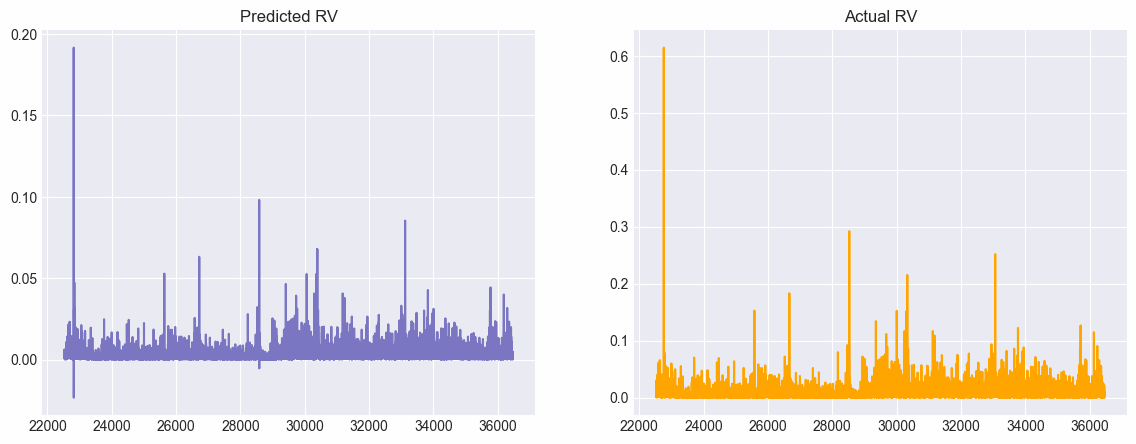

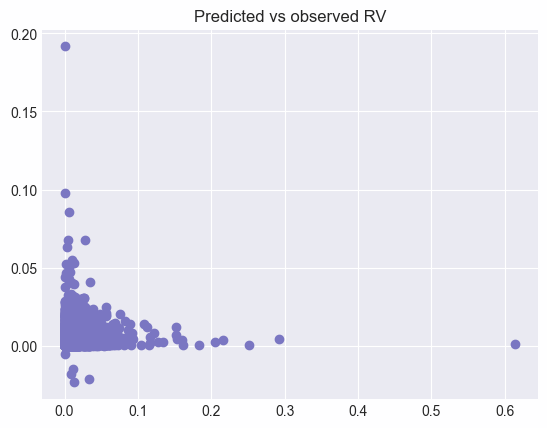

In [361]:
# Perform out of sample prediction
y_hat = results.predict(X_test)

plt.figure(figsize = (14,5))

#Predicted RV
plt.subplot(1,2,1)
plt.plot(y_test.index, y_hat)
plt.title("Predicted RV")

#Actual RV
plt.subplot(1,2,2)
plt.plot(y_test.index, y_test, color = "orange")
plt.title("Actual RV")
plt.show()

plt.scatter(y_test, y_hat)
plt.title("Predicted vs observed RV")
plt.show()

In [362]:
#In-sample scores
print("In-sample scores")

y_hat_is = results.predict(X_train)
mse_is = mse(y_hat_is, y_train.values.ravel())
r_sq_is = r2(y_hat_is, y_train.values.ravel())
mae_is = mae(y_hat_is, y_train.values.ravel())
mape_is = mape(y_hat_is, y_train.values.ravel())

print(f"MSE:{mse_is}, R^2:{r_sq_is}, MAE:{mae_is}, MAPE^{mape_is}")      

print("----------------")
               
#Out-of-sample scores
print("Out-of-sample scores")
               
mse_oos = mse(y_hat, y_test.values.ravel())
r_sq_oos = r2(y_hat, y_test.values.ravel())
mae_oos = mae(y_hat, y_test.values.ravel())
mape_oos = mape(y_hat, y_test.values.ravel())

print(f"MSE:{mse_oos}, R^2:{r_sq_oos}, MAE:{mae_oos}, , MAPE^{mape_oos}")

In-sample scores
MSE:0.0003565313273562867, R^2:-8.421823957566493, MAE:0.009221600669317785, MAPE^22.42375568371131
----------------
Out-of-sample scores
MSE:0.00021089309728105046, R^2:-9.423071533089903, MAE:0.00785739085605556, , MAPE^25.451751636948856


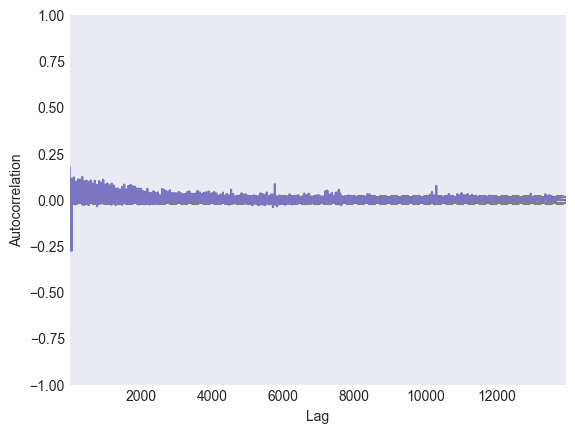

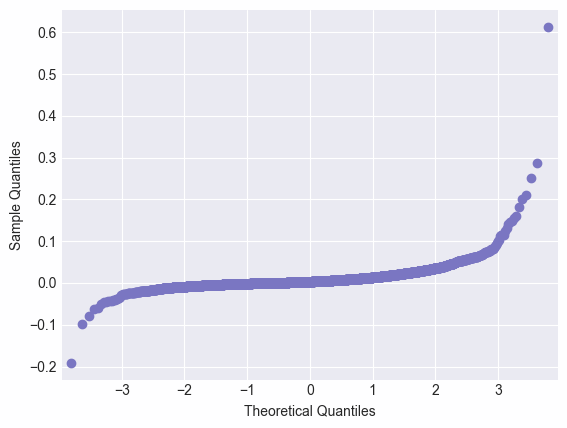

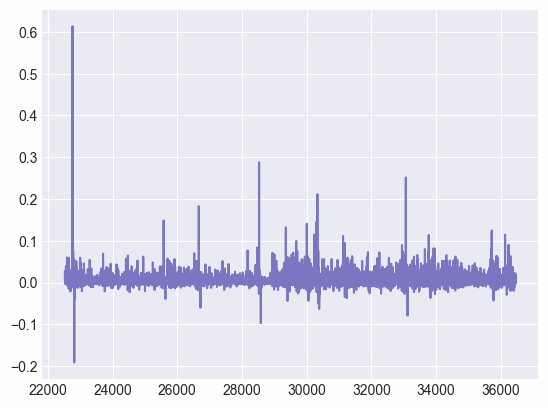

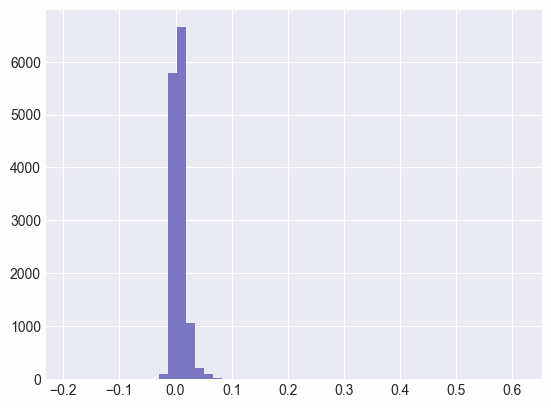

In [364]:
# Residuals
residuals = y_test.values.ravel() - y_hat

autocorrelation_plot(residuals)
plt.show()
qqplot(residuals);plt.show()
plt.plot(residuals);plt.show()
plt.hist(residuals, bins = 50)
plt.show()